In [1]:
ReloadProject('deep_learning')

Path /workspace/external/deep_learning added to PYTHON_PATH.


Using TensorFlow backend.


notebook_init.py imported and reloaded
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: Dict
forwarded symbol: InputLayer
forwarded symbol: List
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: Tuple
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: model_optimization
forwarded symbol: model_optimization
reloaded: openai_wrapper
forwarded symbol: openai_wrapper
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: q_function_memoization
forwarded symbol: q_function_memoization
reloaded: q_learning
forwarded symbol: q_learning
reloaded: q_learning_impl
forwarded symbol: q_learning_impl
reloaded: q_learning_impl_v2
forwarded symbol: q_learning_impl_v2
reloaded: q_learning_v2
forwarded symbol: q_learning_v2


## Try out the enviroments

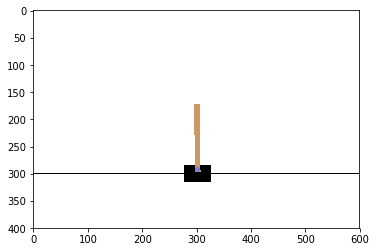

CPU times: user 2.66 s, sys: 77.7 ms, total: 2.73 s
Wall time: 3.02 s


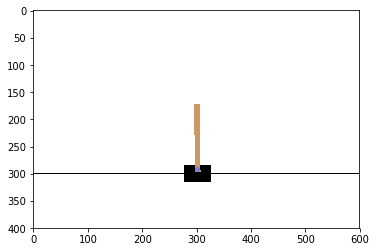

In [56]:
%%time

env = gym.make('CartPole-v1')
env.reset()
for _ in range(10):
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    env.step(env.action_space.sample())

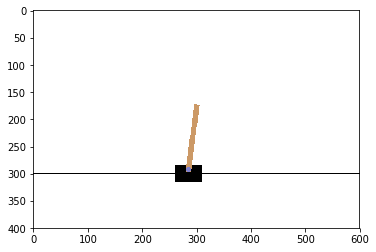

CPU times: user 2.53 s, sys: 53 ms, total: 2.58 s
Wall time: 2.82 s


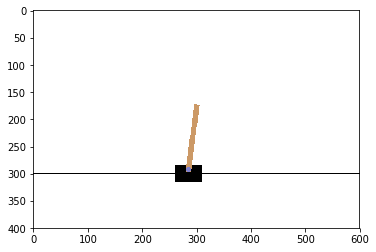

In [77]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
for ii in range(10):
    env.PlotState()
    env.TakeAction(np.random.randint(2))

## Multi-model Q-Function Learning

In [139]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.MultiModelQFunction(
    env, (), (20, 20, 20), learning_rate=0.9, discount_factor=0.95)
policy = q_learning_impl_v2.MaxValueWithRandomnessPolicy(certainty = 0.95)

# Train.
q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=2000, debug_verbosity=0)

# Test.
q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

GET: ([-0.04231383 -0.93599902  0.09623594  1.56470283], 0) -> [[-1.8567923]]
GET: ([-0.04231383 -0.93599902  0.09623594  1.56470283], 1) -> [[nan]]
Action 0: ([-0.04231383 -0.93599902  0.09623594  1.56470283]) -> ([-0.06103381 -1.13213062  0.12753     1.88578866]), reward: 1.0
GET: ([-0.06103381 -1.13213062  0.12753     1.88578866], 0) -> [[-1.8567923]]
GET: ([-0.06103381 -1.13213062  0.12753     1.88578866], 1) -> [[nan]]
GET: ([-0.04231383 -0.93599902  0.09623594  1.56470283], 0) -> [[-1.8567923]]
SET: ([-0.04231383 -0.93599902  0.09623594  1.56470283], 0) <- [[-0.8732367]]
GET: ([-0.06103381 -1.13213062  0.12753     1.88578866], 0) -> [[-1.8371212]]
GET: ([-0.06103381 -1.13213062  0.12753     1.88578866], 1) -> [[nan]]
Action 0: ([-0.06103381 -1.13213062  0.12753     1.88578866]) -> ([-0.08367642 -1.32838822  0.16524577  2.21517663]), reward: 1.0
GET: ([-0.08367642 -1.32838822  0.16524577  2.21517663], 0) -> [[-1.8371212]]
GET: ([-0.08367642 -1.32838822  0.16524577  2.21517663], 1)

In [144]:
env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = False)
q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=40, debug_verbosity=2)

Action 0: ([0. 0. 0. 0.]) -> ([-0.0373058  -0.23197974  0.02949228  0.26608643]), reward: 1.0
Action 0: ([-0.0373058  -0.23197974  0.02949228  0.26608643]) -> ([-0.04194539 -0.42750993  0.03481401  0.56792365]), reward: 1.0
Action 0: ([-0.04194539 -0.42750993  0.03481401  0.56792365]) -> ([-0.05049559 -0.62310247  0.04617248  0.87136793]), reward: 1.0
Action 0: ([-0.05049559 -0.62310247  0.04617248  0.87136793]) -> ([-0.06295764 -0.81882097  0.06359984  1.17820267]), reward: 1.0
Action 0: ([-0.06295764 -0.81882097  0.06359984  1.17820267]) -> ([-0.07933406 -1.0147086   0.08716389  1.49012581]), reward: 1.0
Action 0: ([-0.07933406 -1.0147086   0.08716389  1.49012581]) -> ([-0.09962823 -1.21077698  0.11696641  1.8087056 ]), reward: 1.0
Action 0: ([-0.09962823 -1.21077698  0.11696641  1.8087056 ]) -> ([-0.12384377 -1.40699315  0.15314052  2.13532857]), reward: 1.0
Action 0: ([-0.12384377 -1.40699315  0.15314052  2.13532857]) -> ([-0.15198363 -1.60326443  0.19584709  2.47113756]), reward: 

OpenAiWrapperError: gym environment returned done.

## Single-model Q-Function Learning

In [3]:
INPUT_SHAPE = (1, 4)

def GetPolicyValue(
    qfunc,
    policy,
    env: openai_wrapper.GymEnvironment,
    num_simulations: int = 100,
    max_steps_in_simulation: int = 5000,
    print_values: bool = False,
) -> float:
    """Gets the potential value of a policy via simulation."""
    env.ChangeSettings(continue_from_done=False)
    values = []
    for _ in range(num_simulations):
        values.append(_GetValueFromOneSimulation(qfunc, policy, env, max_steps_in_simulation))
    if print_values:
        print(values)
    return np.average(values)

def _GetValueFromOneSimulation(
    qfunc,
    policy,
    env: openai_wrapper.GymEnvironment,
    max_steps_in_simulation: int,
) -> int:
    """Gets the value of a policy using one simulaion."""
    env.Reset()
    reward = 0.0
    for _ in range(max_steps_in_simulation):
        state = env.GetState()
        try:
            reward += env.TakeAction(policy.Decide(qfunc, state, env.GetActionSpace()))
        except openai_wrapper.OpenAiEnvironmentDone:
            break
    return reward

In [11]:
env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (6, 20, 20), 1000, learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

GetPolicyValue(qfunc, policy, env)

13.06

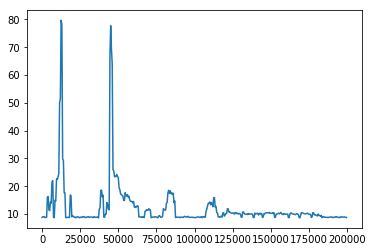

CPU times: user 26min 28s, sys: 34.3 s, total: 27min 2s
Wall time: 28min 40s


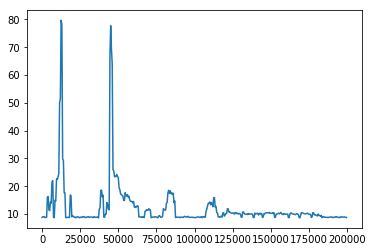

In [35]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (6, 20, 20), 1000, learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

VALUE_HISTORY = []
def PlotHistory():
    display.clear_output(wait=True)
    y = [p[1] for p in VALUE_HISTORY]
    x = [p[0] for p in VALUE_HISTORY]
    plt.clf()
    plt.plot(x, y)
    display.display(plt.gcf())  

def Inspect(step_idx):
    score = GetPolicyValue(qfunc, policy, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))
    VALUE_HISTORY.append((step_idx, score))
    PlotHistory()

# Train.
q_learning_v2.Run(
    env=env, qfunc=qfunc, policy=policy,
    num_of_runs=200000,
    callback_func = Inspect,
    debug_verbosity=0)

# Test.
# q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

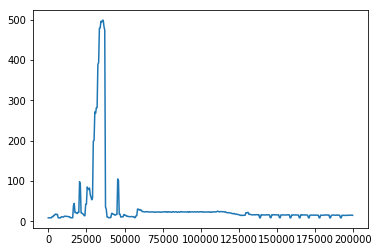

CPU times: user 43min 23s, sys: 56.7 s, total: 44min 20s
Wall time: 46min 54s


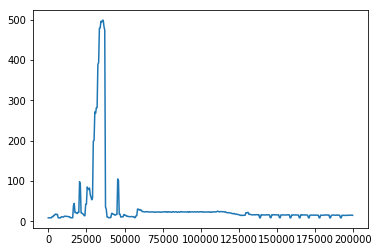

In [36]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (6, 20, 20), 1000, learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

VALUE_HISTORY = []
def PlotHistory():
    display.clear_output(wait=True)
    y = [p[1] for p in VALUE_HISTORY]
    x = [p[0] for p in VALUE_HISTORY]
    plt.clf()
    plt.plot(x, y)
    display.display(plt.gcf())  

def Inspect(step_idx):
    score = GetPolicyValue(qfunc, policy, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))
    VALUE_HISTORY.append((step_idx, score))
    PlotHistory()

# Train.
q_learning_v2.Run(
    env=env, qfunc=qfunc, policy=policy,
    num_of_runs=200000,
    callback_func = Inspect,
    debug_verbosity=0)

# Test.
# q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

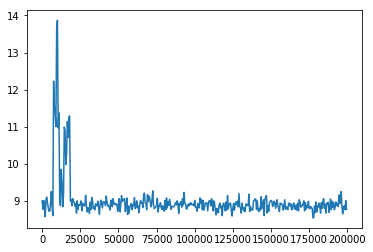

CPU times: user 25min 30s, sys: 32.2 s, total: 26min 3s
Wall time: 27min 35s


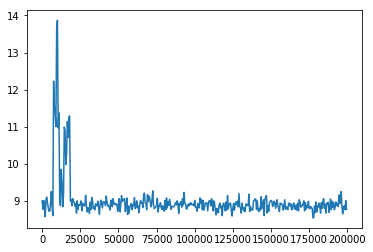

In [37]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (6, 20, 20), 1000, learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

VALUE_HISTORY = []
def PlotHistory():
    display.clear_output(wait=True)
    y = [p[1] for p in VALUE_HISTORY]
    x = [p[0] for p in VALUE_HISTORY]
    plt.clf()
    plt.plot(x, y)
    display.display(plt.gcf())  

def Inspect(step_idx):
    score = GetPolicyValue(qfunc, policy, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))
    VALUE_HISTORY.append((step_idx, score))
    PlotHistory()

# Train.
q_learning_v2.Run(
    env=env, qfunc=qfunc, policy=policy,
    num_of_runs=200000,
    callback_func = Inspect,
    debug_verbosity=0)

# Test.
# q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

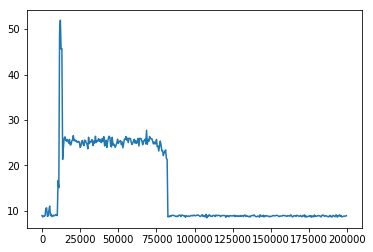

CPU times: user 30min 48s, sys: 38.4 s, total: 31min 26s
Wall time: 33min 17s


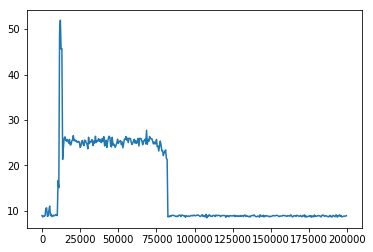

In [38]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (6, 20, 20), 1000, learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

VALUE_HISTORY = []
def PlotHistory():
    display.clear_output(wait=True)
    y = [p[1] for p in VALUE_HISTORY]
    x = [p[0] for p in VALUE_HISTORY]
    plt.clf()
    plt.plot(x, y)
    display.display(plt.gcf())  

def Inspect(step_idx):
    score = GetPolicyValue(qfunc, policy, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))
    VALUE_HISTORY.append((step_idx, score))
    PlotHistory()

# Train.
q_learning_v2.Run(
    env=env, qfunc=qfunc, policy=policy,
    num_of_runs=200000,
    callback_func = Inspect,
    debug_verbosity=0)

# Test.
# q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

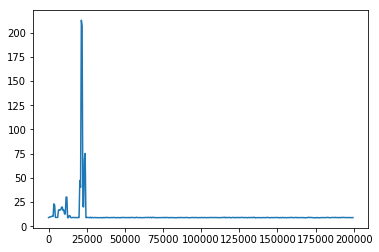

CPU times: user 28min 14s, sys: 34.6 s, total: 28min 49s
Wall time: 30min 31s


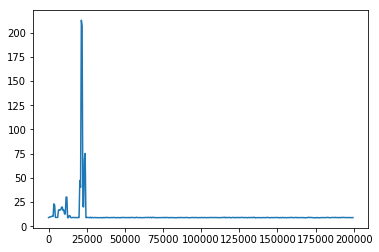

In [39]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (6, 20, 20), 1000, learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

VALUE_HISTORY = []
def PlotHistory():
    display.clear_output(wait=True)
    y = [p[1] for p in VALUE_HISTORY]
    x = [p[0] for p in VALUE_HISTORY]
    plt.clf()
    plt.plot(x, y)
    display.display(plt.gcf())  

def Inspect(step_idx):
    score = GetPolicyValue(qfunc, policy, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))
    VALUE_HISTORY.append((step_idx, score))
    PlotHistory()

# Train.
q_learning_v2.Run(
    env=env, qfunc=qfunc, policy=policy,
    num_of_runs=200000,
    callback_func = Inspect,
    debug_verbosity=0)

# Test.
# q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

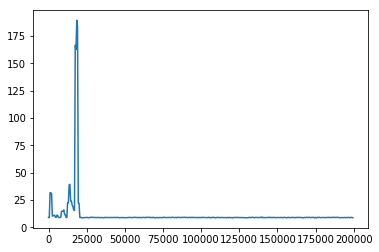

CPU times: user 29min 19s, sys: 34.5 s, total: 29min 54s
Wall time: 31min 41s


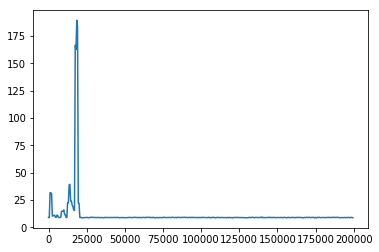

In [40]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (6, 20, 20), 1000, learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

VALUE_HISTORY = []
def PlotHistory():
    display.clear_output(wait=True)
    y = [p[1] for p in VALUE_HISTORY]
    x = [p[0] for p in VALUE_HISTORY]
    plt.clf()
    plt.plot(x, y)
    display.display(plt.gcf())  

def Inspect(step_idx):
    score = GetPolicyValue(qfunc, policy, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))
    VALUE_HISTORY.append((step_idx, score))
    PlotHistory()

# Train.
q_learning_v2.Run(
    env=env, qfunc=qfunc, policy=policy,
    num_of_runs=200000,
    callback_func = Inspect,
    debug_verbosity=0)

# Test.
# q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

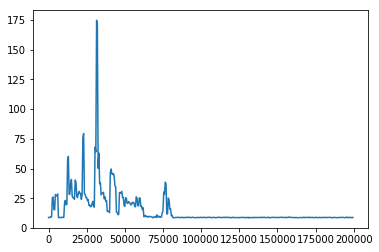

CPU times: user 37min 2s, sys: 42.8 s, total: 37min 45s
Wall time: 39min 45s


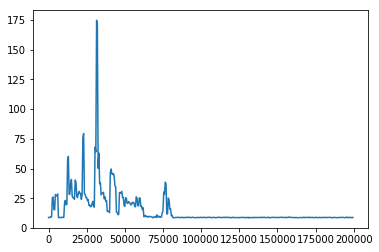

In [48]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (20, 40, 40), 1000, learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

VALUE_HISTORY = []
def PlotHistory():
    display.clear_output(wait=True)
    y = [p[1] for p in VALUE_HISTORY]
    x = [p[0] for p in VALUE_HISTORY]
    plt.clf()
    plt.plot(x, y)
    display.display(plt.gcf())  

def Inspect(step_idx):
    score = GetPolicyValue(qfunc, policy, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))
    VALUE_HISTORY.append((step_idx, score))
    PlotHistory()

# Train.
q_learning_v2.Run(
    env=env, qfunc=qfunc, policy=policy,
    num_of_runs=200000,
    callback_func = Inspect,
    debug_verbosity=0)

# Test.
# q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

KeyboardInterrupt: 

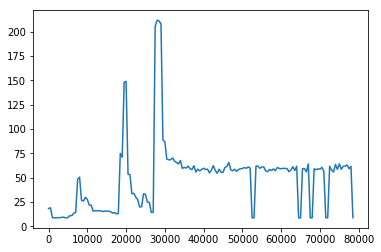

In [12]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (6, 6, 6), 1000, num_batch_write=2,
    learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

VALUE_HISTORY = []
def PlotHistory():
    display.clear_output(wait=True)
    y = [p[1] for p in VALUE_HISTORY]
    x = [p[0] for p in VALUE_HISTORY]
    plt.clf()
    plt.plot(x, y)
    display.display(plt.gcf())  

def Inspect(step_idx):
    score = GetPolicyValue(qfunc, policy, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))
    VALUE_HISTORY.append((step_idx, score))
    PlotHistory()

# Train.
q_learning_v2.Run(
    env=env, qfunc=qfunc, policy=policy,
    num_of_runs=200000,
    callback_func = Inspect,
    debug_verbosity=0)

# Test.
# q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

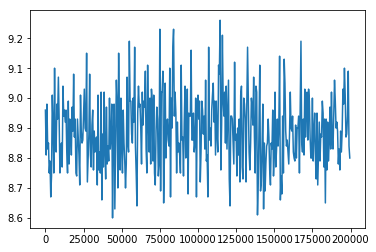

CPU times: user 4h 9min 32s, sys: 4min 27s, total: 4h 13min 59s
Wall time: 4h 15min 23s


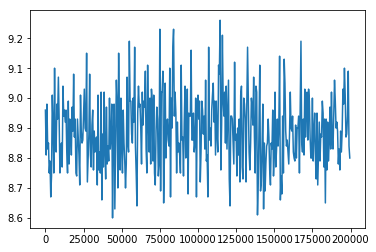

In [16]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (6, 12, 6), 1000, num_batch_write=40,
    learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

VALUE_HISTORY = []
def PlotHistory():
    display.clear_output(wait=True)
    y = [p[1] for p in VALUE_HISTORY]
    x = [p[0] for p in VALUE_HISTORY]
    plt.clf()
    plt.plot(x, y)
    display.display(plt.gcf())  

def Inspect(step_idx):
    score = GetPolicyValue(qfunc, policy, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))
    VALUE_HISTORY.append((step_idx, score))
    PlotHistory()

# Train.
q_learning_v2.Run(
    env=env, qfunc=qfunc, policy=policy,
    num_of_runs=200000,
    callback_func = Inspect,
    debug_verbosity=0)

# Test.
# q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

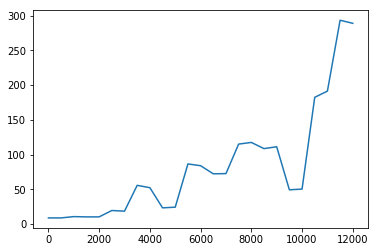

KeyboardInterrupt: 

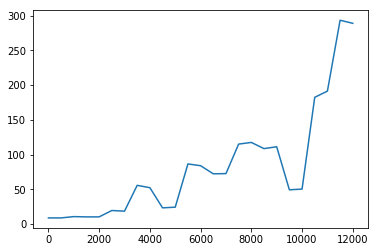

In [49]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.KerasModelQFunctionBatchWrite(
    env, (6, 20, 20), 1000, learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)

VALUE_HISTORY = []
def PlotHistory():
    display.clear_output(wait=True)
    y = [p[1] for p in VALUE_HISTORY]
    x = [p[0] for p in VALUE_HISTORY]
    plt.clf()
    plt.plot(x, y)
    display.display(plt.gcf())  

def Inspect(step_idx):
    score = GetPolicyValue(qfunc, policy, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))
    VALUE_HISTORY.append((step_idx, score))
    PlotHistory()

# Train.
q_learning_v2.Run(
    env=env, qfunc=qfunc, policy=policy,
    num_of_runs=200000,
    callback_func = Inspect,
    debug_verbosity=0)

# Test.
# q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)